## Import Statements

In [29]:
import numpy as np
import pandas as pd

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
news = pd.read_csv("ProcessedData.tsv", delimiter = '\t', encoding = 'utf-8')

In [8]:
news.head()

,NewCategory,title,author,published_date,updated_on,slug,blurb,body
0,Business & Finance,Bitcoin is down 60 percent this year. Here's w...,Timothy B. Lee,3/31/2014 14:01,12/16/2014 16:37,http://www.vox.com/2014/3/31/5557170/bitcoin-b...,Bitcoins have lost more than 60 percent of the...,The markets haven't been kind to Bitcoin in 20...
1,Crime,6 health problems marijuana could treat better...,German Lopez,3/31/2014 15:44,11/17/2014 0:20,http://www.vox.com/2014/3/31/5557700/six-probl...,Medical marijuana could fill gaps that current...,Twenty states have so far legalized the medica...
2,Business & Finance,9 charts that explain the history of global we...,Matthew Yglesias,4/10/2014 13:30,12/16/2014 15:47,http://www.vox.com/2014/4/10/5561608/9-charts-...,These nine charts from Thomas Piketty's new bo...,Thomas Piketty's book Capital in the 21st Cent...
3,Crime,Remember when legal marijuana was going to sen...,German Lopez,4/3/2014 23:25,5/6/2014 21:58,http://www.vox.com/2014/4/3/5563134/marijuana-...,"Three months after legalizing marijuana, Denve...",When Colorado legalized recreational marijuana...
4,Technology & Health,Obamacare succeeded for one simple reason: it'...,Sarah Kliff,4/1/2014 20:26,11/18/2014 15:09,http://www.vox.com/2014/4/1/5570780/the-two-re...,"After a catastrophic launch, Obamacare still s...",There's a very simple reason that Obamacare hi...


In [9]:
news['NewCategory'].unique() # unique category labels

array(['Business & Finance', 'Crime', 'Technology & Health', 'Politics',
       'Entertainment'], dtype=object)

In [10]:
news['title'] = news['title'].str.replace('[^\w\s]','').str.lower() # unpunctuate and lower case
news['NewCategory'] = news['NewCategory'].str.replace('[^\w\s]','').str.lower() # unpunctuate and lower case

## Vectorization

In [11]:
# convert data to vectors
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(news['title'])

y = news['NewCategory']

## Splitting the Data into Training and Testing

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 30% split

## Training SGD Classifier

In [13]:
sgd = SGDClassifier(n_jobs=-1, penalty='l2', max_iter= 1000, random_state=1234)

# hyperparameters for tuning
sgd_grid = [{'loss': ['hinge', 'log', 'squared_hinge'],
             'alpha': [0.0001, 0.0001, 0.00001]}]

# grid search with cross validation
sgd_search = GridSearchCV(estimator=sgd, param_grid=sgd_grid, cv=10, refit=True)
sgd_search.fit(X_train, y_train)

/Users/shubh/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=-1,
                                     penalty='l2', power_t=0.5,
                                     random_state=1234, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'alpha': [0.0001, 0.0001, 1e-05],
                          'loss': ['hinge', 'log', 'squared_hinge']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=

In [14]:
y_pred = sgd_search.predict(X_test)


In [17]:
sgd_search.best_estimator_.score(X_test, y_test)

0.7560627674750356

## Hyperparameter Tuning

In [18]:
sgd = SGDClassifier(n_jobs=-1, penalty='elasticnet', max_iter=1000, random_state=1234 )

# hyperparameters for tuning
sgd_grid = [{'loss': ['hinge', 'log', 'squared_hinge'],
             'alpha': [0.0001, 0.0001, 0.00001]}]

# grid search with cross validation
sgd_search = GridSearchCV(estimator=sgd, param_grid=sgd_grid, cv=50, refit=True)
sgd_search.fit(X_train, y_train)

/Users/shubh/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


GridSearchCV(cv=50, error_score='raise-deprecating',
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=-1,
                                     penalty='elasticnet', power_t=0.5,
                                     random_state=1234, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'alpha': [0.0001, 0.0001, 1e-05],
                          'loss': ['hinge', 'log', 'squared_hinge']}],
             pre_dispatch='2*n_jobs', refit=True, return_trai

In [19]:
y_pred = sgd_search.predict(X_test)

## Performance Metric

In [20]:
# Train a new classifier using the best parameters found by the grid search
print("Accuracy of SGD Classifier model:", sgd_search.best_estimator_.score(X_test, y_test)*100)

Accuracy of SGD Classifier model: 75.60627674750357


In [21]:
from sklearn.metrics import f1_score
print("F1 Score for all the categories:")
f1_score(y_test, y_pred, average=None)

F1 Score for all the categories:


array([0.35918367, 0.72052762, 0.68833652, 0.84024323, 0.6509009 ])

In [39]:
from sklearn.metrics import confusion_matrix
m = confusion_matrix(y_test, y_pred)
m

array([[  44,    7,   31,   58,   30],
       [   4,  437,   34,  135,   22],
       [   8,   43,  360,   96,   42],
       [  16,   77,   36, 1520,   58],
       [   3,   17,   36,  102,  289]])

In [40]:
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred,output_dict=True)
print(classification_report(y_test,y_pred))

                    precision    recall  f1-score   support

 business  finance       0.59      0.26      0.36       170
             crime       0.75      0.69      0.72       632
     entertainment       0.72      0.66      0.69       549
          politics       0.80      0.89      0.84      1707
technology  health       0.66      0.65      0.65       447

          accuracy                           0.76      3505
         macro avg       0.70      0.63      0.65      3505
      weighted avg       0.75      0.76      0.75      3505



In [41]:
df11 = pd.DataFrame(report).transpose()
df11

,precision,recall,f1-score,support
business finance,0.586667,0.258824,0.359184,170.000000
crime,0.752151,0.691456,0.720528,632.000000
entertainment,0.724346,0.655738,0.688337,549.000000
politics,0.795395,0.890451,0.840243,1707.000000
technology health,0.655329,0.646532,0.650901,447.000000
accuracy,0.756063,0.756063,0.756063,0.756063
macro avg,0.702778,0.628600,0.651838,3505.000000
weighted avg,0.748482,0.756063,0.747384,3505.000000


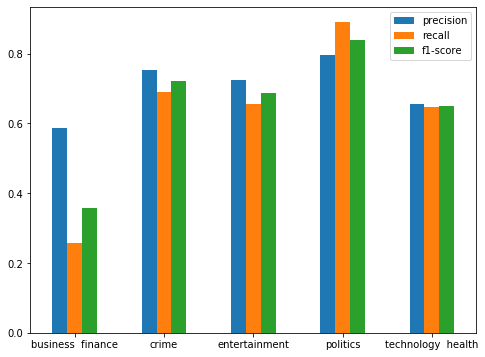

In [71]:
import matplotlib.pyplot as plt
import pandas as pd
bb= ['precision','recall','f1-score']
# a simple line plot
df11.iloc[0:5].plot(kind='bar',y= bb,figsize=(8,6),rot=0)

In [44]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Reds')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.xlim(-0.5, len(np.unique(y))-0.5)
    plt.ylim(len(np.unique(y))-0.5, -0.5)
    plt.tight_layout()
  
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

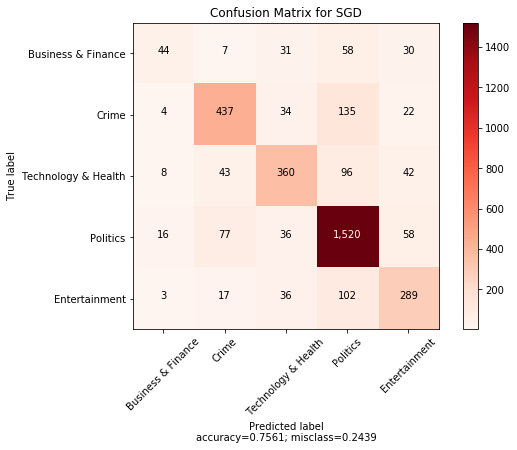

In [45]:
plot_confusion_matrix(cm           = m, 
                                    normalize    = False,
                                    target_names = ['Business & Finance', 'Crime', 'Technology & Health', 'Politics','Entertainment'],
                                    title        = "Confusion Matrix for SGD")
                      
                            